In [738]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
from sklearn.model_selection import train_test_split

In [739]:
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" 
print(f"Using device: {device}")
# torch.manual_seed(22)

Using device: mps


# load data and show


In [740]:
df = pd.read_csv('train.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Pre processing data


count nulls and discribe data


In [741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [742]:
print("Count of null: ")
print(df.isnull().sum())
print("\nCount of dup: ",df.duplicated().sum())

Count of null: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Count of dup:  0


In [743]:
print("shape of data: ", df.shape)

shape of data:  (891, 12)


show nulls


In [744]:
null_rows = df[df.isnull().any(axis=1)]
display(null_rows)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


drop columns with lots of nulls


In [745]:
df = df.drop('Cabin', axis=1)

In [746]:
# discribe data
print(df.isnull().sum())
df.describe()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [747]:
df['Age'].fillna(random.uniform(29,30),inplace=True)

In [748]:
# drop null rows
df = df.dropna()
display(df.isnull().sum())
print("shape of data: ", df.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

shape of data:  (889, 11)


# Data Splitting


change strings to integers for admissible values


<Axes: xlabel='Embarked', ylabel='count'>

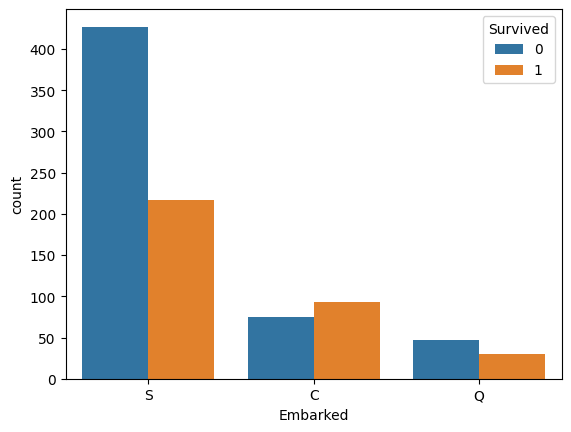

In [749]:
sns.countplot(df, x="Embarked", hue=df['Survived'])

In [750]:
print(df['Embarked'].value_counts())
# S:1 , C:2 , Q:3
# df['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)
# print(pd.get_dummies(df, columns=['Embarked']))
df = pd.get_dummies(df, columns=['Embarked'])
# df[['C', 'Q', 'S']] = df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)
# df = df.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'],axis=1)
display(df)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.298425,1,2,W./C. 6607,23.4500,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,True,False,False


<Axes: xlabel='Pclass', ylabel='count'>

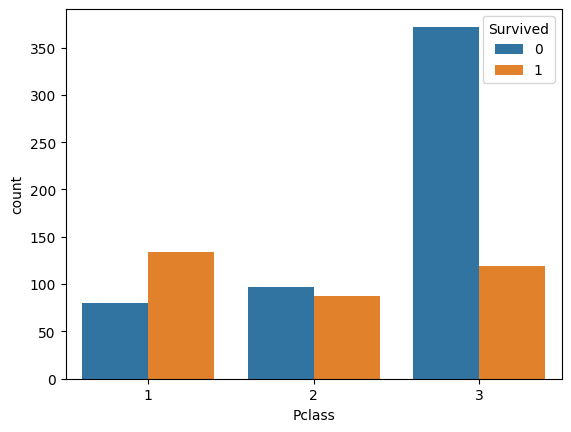

In [751]:
sns.countplot(df, x="Pclass", hue="Survived")

% of women who survived: 0.74
% of men who survived: 0.19
count of male : 169 
count of female 658


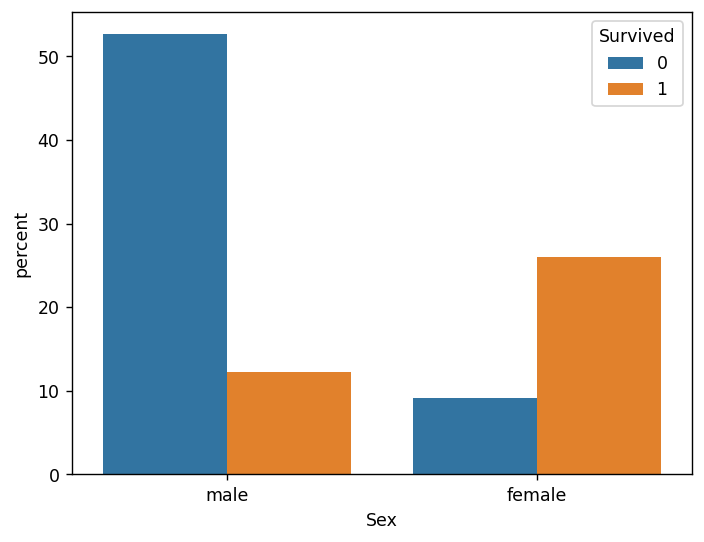

In [752]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = round(sum(women)/len(women),2)
print("% of women who survived:", rate_women)
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = round(sum(men)/len(men),2)
print("% of men who survived:", rate_men)

plt.figure(dpi=125)
sns.countplot(x=df['Sex'], hue=df['Survived'], data=df,stat="percent")
maleSurv = round(rate_men * len(df.Sex == 'male'))
womenSurv = round(rate_women * len(df.Sex == 'female'))
print("count of male :",maleSurv,"\ncount of female", womenSurv)

In [753]:
print(df['Sex'].value_counts())

df['Sex'].replace({'male':1,'female':0},inplace=True)
display(df)

Sex
male      577
female    312
Name: count, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.298425,1,2,W./C. 6607,23.4500,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,True,False,False


In [754]:
print(df['Survived'].value_counts())

Survived
0    549
1    340
Name: count, dtype: int64


SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


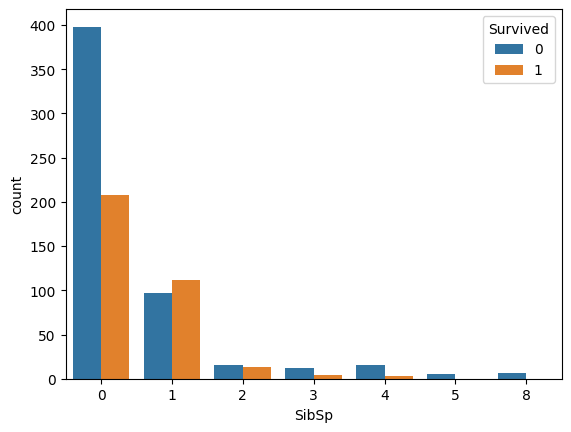

In [755]:
sns.countplot(x='SibSp', hue='Survived', data=df)
print(df['SibSp'].value_counts())

In [756]:
df.info()
df = df.drop(['Ticket', 'PassengerId', 'Name','SibSp',  'Parch','Fare','Embarked_C','Embarked_Q','Embarked_S'], axis=1)
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked_C   889 non-null    bool   
 11  Embarked_Q   889 non-null    bool   
 12  Embarked_S   889 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(2)
memory usage: 79.0+ KB


,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [757]:
df = df.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    889 non-null    float64
 2   Sex       889 non-null    float64
 3   Age       889 non-null    float64
dtypes: float64(4)
memory usage: 34.7 KB


Splitting data and normalization


In [758]:
from sklearn.preprocessing import MinMaxScaler

x = df.drop('Survived', axis=1)
y = df['Survived']
# normalize
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [759]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)
print(f"Train set size: {len(x_train)}")
print(f"Test set size: {len(x_test)}")

Train set size: 711
Test set size: 178


convet to tensor


In [760]:
x_train = torch.tensor(x_train,dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: torch.Size([711, 3])
x_test shape: torch.Size([178, 3])
y_train shape: torch.Size([711, 1])
y_test shape: torch.Size([178, 1])


In [761]:
trainloader = torch.utils.data.DataLoader(list(zip(x_train, y_train)), shuffle=True,batch_size=64)
testloader = torch.utils.data.DataLoader(list(zip(x_test, y_test)), shuffle=True, batch_size=64)
plotloader = torch.utils.data.DataLoader(list(zip(x_test, y_test)), shuffle=True, batch_size=1)

Create model


In [762]:
inputs = len(x_train[1])
class TitanicModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
      nn.Linear(inputs, 64),
      nn.ReLU(),
      # nn.Dropout(0.3),

      nn.Linear(64, 32),
      nn.ReLU(),
      # nn.Dropout(0.3),
      
      nn.Linear(32, 1),
      nn.Sigmoid()
    )
  def forward(self, x):
    return self.model(x)
  
model = TitanicModel()

In [763]:
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [764]:
epochs = 500
train_loss_history = []
train_accuracys_history = []
train_loss = 0
train_acc = 0

test_loss_history = []
test_accuracys_history = []
test_loss = 0
test_acc = 0

In [765]:
for epoch in range(epochs):
    model.train()
    for data, target in trainloader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += ((output > 0.5).type(torch.float) == target).type(torch.float).sum().item()
    train_loss /= len(trainloader.dataset)
    train_acc /= len(trainloader.dataset)
    train_loss_history.append(train_loss)
    train_accuracys_history.append(train_acc)
    # Test Phase
    model.eval()
    with torch.inference_mode():
        for data, target in testloader:
            output = model(data)
            loss = loss_function(output, target)
            test_loss += loss.item()
            test_acc += ((output > 0.5).type(torch.float) == target).type(torch.float).sum().item()
    test_loss /= len(testloader.dataset)
    test_acc /= len(testloader.dataset)
    test_loss_history.append(test_loss)
    test_accuracys_history.append(test_acc)
    if epoch % (epochs*0.1) == 0 or epoch == (epochs-1): 
        print(f'Epoch {epoch+1}/{epochs} '
        f' Train Loss: {train_loss:.4f}, Accuracy: {train_acc*100:.2f}%'
        f'  --  Test Loss: {test_loss:.4f}, Accuracy: {test_acc*100:.2f}%')

Epoch 1/500  Train Loss: 0.0116, Accuracy: 62.03%  --  Test Loss: 0.0115, Accuracy: 61.24%


Epoch 51/500  Train Loss: 0.0087, Accuracy: 78.31%  --  Test Loss: 0.0085, Accuracy: 80.23%
Epoch 101/500  Train Loss: 0.0079, Accuracy: 78.45%  --  Test Loss: 0.0075, Accuracy: 80.23%
Epoch 151/500  Train Loss: 0.0076, Accuracy: 78.73%  --  Test Loss: 0.0072, Accuracy: 80.23%
Epoch 201/500  Train Loss: 0.0074, Accuracy: 79.16%  --  Test Loss: 0.0073, Accuracy: 81.36%
Epoch 251/500  Train Loss: 0.0072, Accuracy: 79.58%  --  Test Loss: 0.0071, Accuracy: 81.35%
Epoch 301/500  Train Loss: 0.0073, Accuracy: 79.01%  --  Test Loss: 0.0074, Accuracy: 79.10%
Epoch 351/500  Train Loss: 0.0070, Accuracy: 78.73%  --  Test Loss: 0.0072, Accuracy: 79.66%
Epoch 401/500  Train Loss: 0.0071, Accuracy: 79.86%  --  Test Loss: 0.0073, Accuracy: 80.23%
Epoch 451/500  Train Loss: 0.0073, Accuracy: 79.30%  --  Test Loss: 0.0073, Accuracy: 80.22%
Epoch 500/500  Train Loss: 0.0077, Accuracy: 79.72%  --  Test Loss: 0.0074, Accuracy: 80.23%


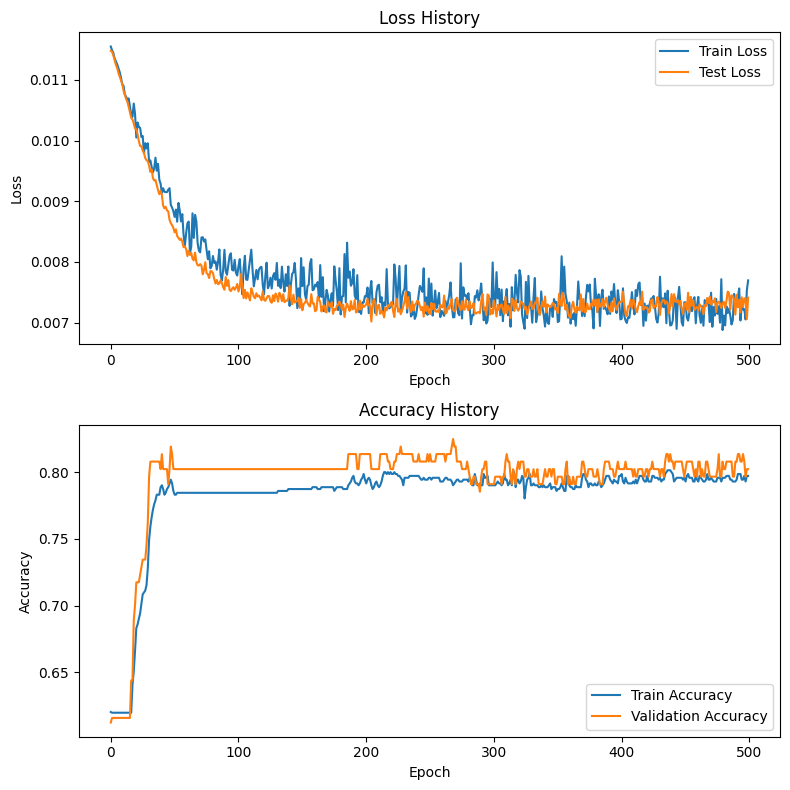

In [766]:

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(212)
plt.plot(train_accuracys_history, label='Train Accuracy')
plt.plot(test_accuracys_history, label='Validation Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Test loop


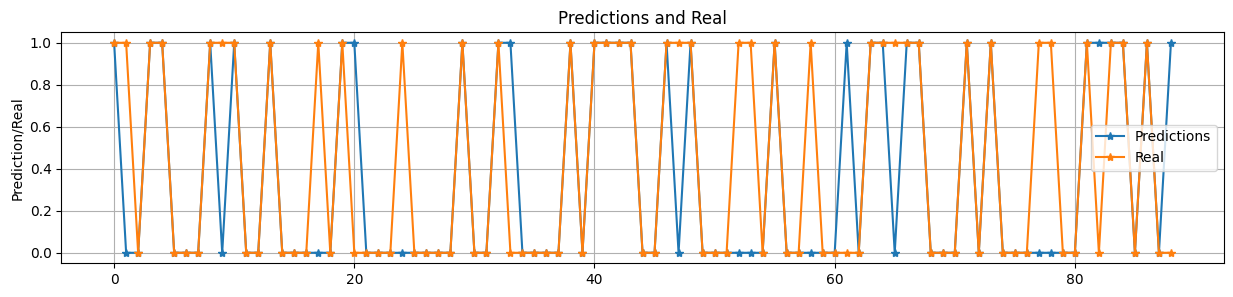

In [767]:
import torch
import matplotlib.pyplot as plt
model.eval()
i=0
with torch.inference_mode():
    test_preds = []
    test_reals = []
    test_losses = []
    for x, y in plotloader:
        i+=1
        test_pred = model(x)
        test_real = y.detach().numpy()
        if i % 2 == 0:
            test_preds.append(round(test_pred.item()))
            test_reals.append(round(test_real.item())) 
plt.figure(figsize=(15, 3))
plt.plot(range(len(test_preds)), test_preds, marker='*', label='Predictions')
plt.plot(range(len(test_reals)), test_reals, marker='*', label='Real')
plt.grid(True)
# Add labels and title
plt.ylabel('Prediction/Real')
plt.title('Predictions and Real')
plt.legend()
plt.show()